In [1]:
from qiskit import *
from qiskit.circuit.library import UnitaryGate
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
simulator = AerSimulator()

import numpy as np
import math
import random

from sympy import Matrix
from sympy.physics.quantum import TensorProduct

import matplotlib.pyplot as plt

%run QuantumFourierTransform.ipynb

In [2]:
# Interfere the output of two unitaries

def Interfere(qc, u_unitary, v_unitary, start_qubit):
    U = UnitaryGate(u_unitary,label='U').control(1)
    V = UnitaryGate(v_unitary,label='V').control(1)
    
    # First Hadamard
    qc.h(start_qubit)
    qc.barrier(label='interfere')
    
    # Interference
    qc.append(U,range(start_qubit,start_qubit+int(math.log(len(u_unitary),2))+1),0)
    
    qc.x(start_qubit)
    qc.append(V,range(start_qubit,start_qubit+int(math.log(len(v_unitary),2))+1),0)
    qc.x(start_qubit)
    
    qc.barrier(label='outerfere')
    # Second Hadamard
    qc.h(start_qubit)
    
    return qc

In [ ]:
# Suppose we have oracle X which determines if a bit string is "good" or not
# This algorithm gives the probability that quantum state A|x> colaspes into a "good" state
# oracle should be a number

def EstAmp(qc, matrix, oracle, size):
    S_0
    
    QFT(qc, size, 0)
    
    

In [3]:
# No False Negatives: Checks to see if a state has negative entries
# Quantum Circuit
# size+1 is the number of qubits(including auxilary qubit)
# U is a matrix which generates some state on 'size' qubits with coefficient alpha
# k is some index in {0,...,2^n -1}
# epsilon is percision

# Output: 1 if alpha_k >= -epsilon, with prob 0.75

def NFN(qc,size,u_unitary,k,epsilon):
    V = np.identity(2**size)
    V[0],V[k] = V[k],V[0].copy()
    
    Interfere(qc,u_unitary,V,0)

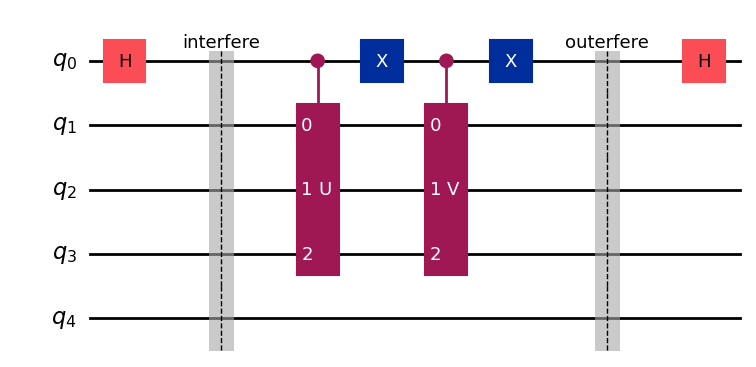

In [4]:
qc = QuantumCircuit(5)

NFN(qc, 3, np.identity(2**3), 1, 0.05)
qc.draw(output='mpl')

In [2]:
def SimplexIter(matrix,basis,cost_vector,epsilon,delta):
    return delta